<a href="https://colab.research.google.com/github/NguyenLuong2612/analyze_textdata/blob/main/analyze_textdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import warnings
warnings.filterwarnings("ignore")


In [ ]:
 df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA/data_TV.csv")

In [ ]:
df.head()

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...


In [ ]:
df = df[['origin_country','name', 'popularity', 'vote_average','vote_count','overview']]
df.head()

,origin_country,name,popularity,vote_average,vote_count,overview
0,US,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,US,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,US,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,US,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,US,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...


In [ ]:
df.isnull().sum()

origin_country     0
name               0
popularity         0
vote_average       0
vote_count         0
overview          65
dtype: int64

In [ ]:
df.columns

Index(['origin_country', 'name', 'popularity', 'vote_average', 'vote_count',
       'overview'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['origin_country'].unique()

array(['US', 'JP', 'CA', 'KR', 'GB', 'AR', 'CN', 'RU', 'MX', 'SE', 'ES',
       'character(0)', 'TH', 'c("US", "GB")', 'CL', 'c("US", "GB", "NZ")',
       'c("US", "NG")', 'FR', 'DE', 'CO', 'IT', 'c("NC", "KR")', 'NO',
       'c("MX", "US")', 'c("GB", "US")', 'c("CA", "US")',
       'c("GB", "CA", "US")', 'TR', 'c("JP", "US")', 'PE', 'BR', 'AU',
       'DK', 'c("CO", "US")', 'IN', 'c("US", "CA", "FR", "BE")',
       'c("US", "AU")', 'c("US", "CA")',
       'c("DE", "GB", "IT", "PL", "RU", "GR")', 'ZA', 'c("CA", "FR")',
       'c("IT", "GB")', 'c("DK", "US")', 'c("US", "CO")', 'IE',
       'c("RU", "UA")', 'c("US", "GB", "FR", "ES", "IT")', 'PH',
       'c("AR", "CO")', 'IL', 'PL', 'PR',
       'c("FR", "ES", "US", "GB", "IT")', 'c("US", "MX")', 'IS',
       'c("US", "FR")', 'JO', 'c("US", "JP", "CA")', 'BE',
       'c("US", "JP")', 'c("BR", "US")', 'c("DE", "US")', 'c("FR", "US")',
       'c("AT", "DE")', 'EG', 'c("MX", "ES")', 'AT',
       'c("VE", "CO", "US")', 'c("AU", "GB", "NZ", "

# Lọc ra danh sách các nước có số lượng phim trên 50 và điểm vote_averange từ 7đ trở lên.

In [ ]:
df_high_vote = df[df['vote_average'] >= 7]
df=df_high_vote.groupby('origin_country').filter(lambda x:len(x)>50 ).reset_index(drop=True)
print('Number of country=>',len(df['origin_country'].unique()))

Number of country=> 5


In [ ]:
df['origin_country'].value_counts()

US    1167
JP     390
GB     148
MX     124
KR      98
Name: origin_country, dtype: int64

## Xử lý (Expand contractions, Lowercase the reviews, Remove digits and words containing digits, Remove punctuations)

In [ ]:
df['origin_country']=df['origin_country'].apply(lambda x: x.split(',,,')[0])

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)
df['overview']=df['overview'].apply(lambda x:expand_contractions(x))

In [ ]:
df['cleaned']=df['overview'].apply(lambda x: x.lower())

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('—',' ',x))

In [ ]:
for index,text in enumerate(df['cleaned'][30:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 surrounded by a forest and a gated entrance the grace field house is inhabited by orphans happily living together as one big family looked after by their mama isabella although they are required to take tests daily the children are free to spend their time as they see fit usually playing outside as long as they do not venture too far from the orphanage   a rule they are expected to follow no matter what however all good times must come to an end as every few months a child is adopted and sent to live with their new family never to be heard from again

however the three oldest siblings have their suspicions about what is actually happening at the orphanage and they are about to discover the cruel fate that awaits the children living at grace field including the twisted nature of their beloved mama
Review 2:
 based off of the original weekly shonen jump manga series from haruichi furudate haikyu is a sliceoflife sports anime revolving around shouyou hinata is love of volleybal

## Xử lý stopword

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['origin_country','lemmatized']].groupby(by='origin_country').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
origin_country,
GB,animal animate comedy series talk animal world...
JP,world eighty percent population kind superpowe...
KR,quest bride break immortal curse yearold guard...
MX,follow misadventure black hat org evil handyma...
US,relative obscurity seemingly normal life overn...


In [ ]:
df_cleaned = df.copy()

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head()

,aan,aaron,aarón,aau,abagail,abandon,abandonment,abby,abc,abduct,...,zummi,zurita,álex,álvarado,álvarez,ángel,æon,érase,évora,ñoño
origin_country,,,,,,,,,,,,,,,,,,,,,
GB,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
JP,0,0,0,0,0,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
KR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MX,0,0,1,0,0,3,1,0,0,0,...,0,2,1,2,4,1,0,1,2,1
US,1,3,0,1,1,8,0,1,13,1,...,1,0,0,0,0,3,1,0,0,0


## Khám phá data

In [ ]:
df_cleaned.head()

,origin_country,name,popularity,vote_average,vote_count,overview,cleaned,lemmatized
0,US,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...,from relative obscurity and a seemingly normal...,relative obscurity seemingly normal life overn...
1,US,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac...",when walter white a new mexico chemistry teach...,walter white new mexico chemistry teacher diag...
2,US,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...,amid the stark discord of twin cities piltover...,amid stark discord twin city piltover zaun sis...
3,US,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...,rick is a mentallyunbalanced but scientificall...,rick mentallyunbalanced scientifically gifted ...
4,US,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...,the family you know and love is here with a br...,family know love brand new series give allacce...


In [ ]:
import nltk
# paste this at the start of code
import ssl
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter

stop=set(stopwords.words('english'))

def tokenize(column):
    tokens = word_tokenize(column)
    return [w for w in tokens if w.isalpha() and w not in stop]
df_cleaned['cleaned_token'] = df_cleaned.apply(lambda x: tokenize(x['cleaned']), axis=1)
df_cleaned.head()

,origin_country,name,popularity,vote_average,vote_count,overview,cleaned,lemmatized,cleaned_token
0,US,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...,from relative obscurity and a seemingly normal...,relative obscurity seemingly normal life overn...,"[relative, obscurity, seemingly, normal, life,..."
1,US,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac...",when walter white a new mexico chemistry teach...,walter white new mexico chemistry teacher diag...,"[walter, white, new, mexico, chemistry, teache..."
2,US,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...,amid the stark discord of twin cities piltover...,amid stark discord twin city piltover zaun sis...,"[amid, stark, discord, twin, cities, piltover,..."
3,US,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...,rick is a mentallyunbalanced but scientificall...,rick mentallyunbalanced scientifically gifted ...,"[rick, mentallyunbalanced, scientifically, gif..."
4,US,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...,the family you know and love is here with a br...,family know love brand new series give allacce...,"[family, know, love, brand, new, series, givin..."


In [ ]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

df_cleaned['cleaned_token'] = df_cleaned['cleaned_token'].apply(lambda x: extract_ngrams(x, 2))
df_cleaned.head()

,origin_country,name,popularity,vote_average,vote_count,overview,cleaned,lemmatized,cleaned_token
0,US,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...,from relative obscurity and a seemingly normal...,relative obscurity seemingly normal life overn...,"[relative obscurity, obscurity seemingly, seem..."
1,US,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac...",when walter white a new mexico chemistry teach...,walter white new mexico chemistry teacher diag...,"[walter white, white new, new mexico, mexico c..."
2,US,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...,amid the stark discord of twin cities piltover...,amid stark discord twin city piltover zaun sis...,"[amid stark, stark discord, discord twin, twin..."
3,US,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...,rick is a mentallyunbalanced but scientificall...,rick mentallyunbalanced scientifically gifted ...,"[rick mentallyunbalanced, mentallyunbalanced s..."
4,US,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...,the family you know and love is here with a br...,family know love brand new series give allacce...,"[family know, know love, love brand, brand new..."


In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list: all_words += word
    return all_words

def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending =False)
    word_count_sorted
    return word_count_sorted[:10]

overview_text = df_cleaned['cleaned_token']
overview_text = combine_words(overview_text)
overview_text[:10]

['relative obscurity',
 'obscurity seemingly',
 'seemingly normal',
 'normal life',
 'life overnight',
 'overnight success',
 'success thrust',
 'thrust hollywood',
 'hollywood limelight',
 'limelight overnight']

In [ ]:
overviews_topword_count = count_topwords(overview_text)
overviews_topword_count.head()

,words,word_count
862,high school,145
7927,new york,76
552,one day,59
2998,television series,57
13196,telenovela produced,33


<Axes: xlabel='words', ylabel='word_count'>

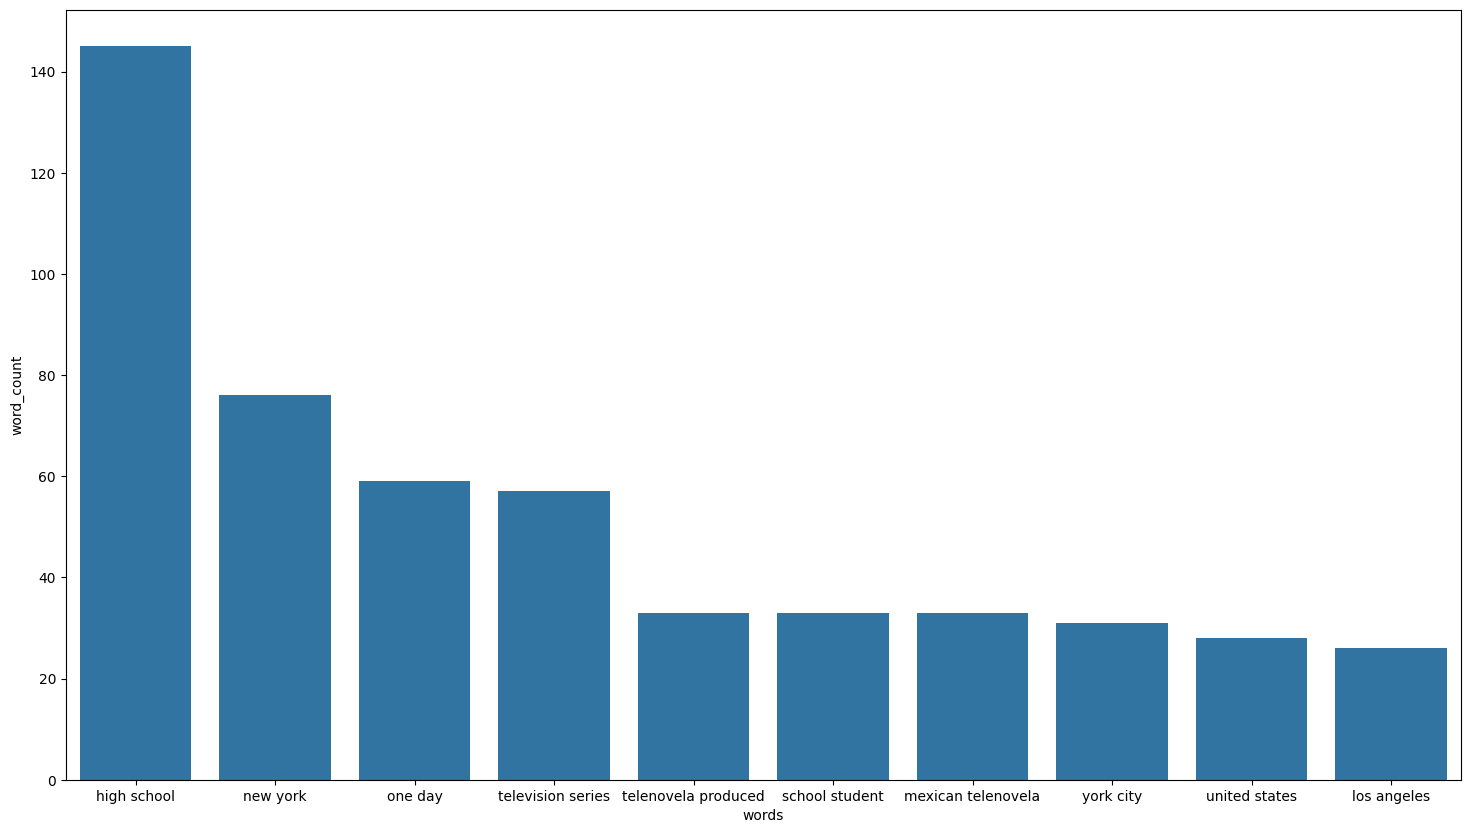

In [ ]:
import seaborn as sns
plt.figure(figsize= (18,10))
sns.barplot(data = overviews_topword_count ,x= overviews_topword_count['words'], y= overviews_topword_count['word_count'] )

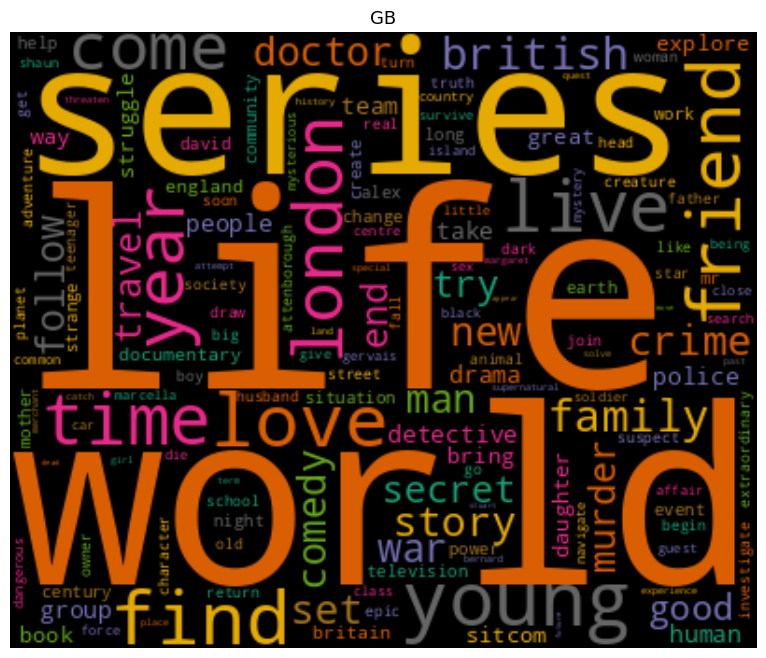

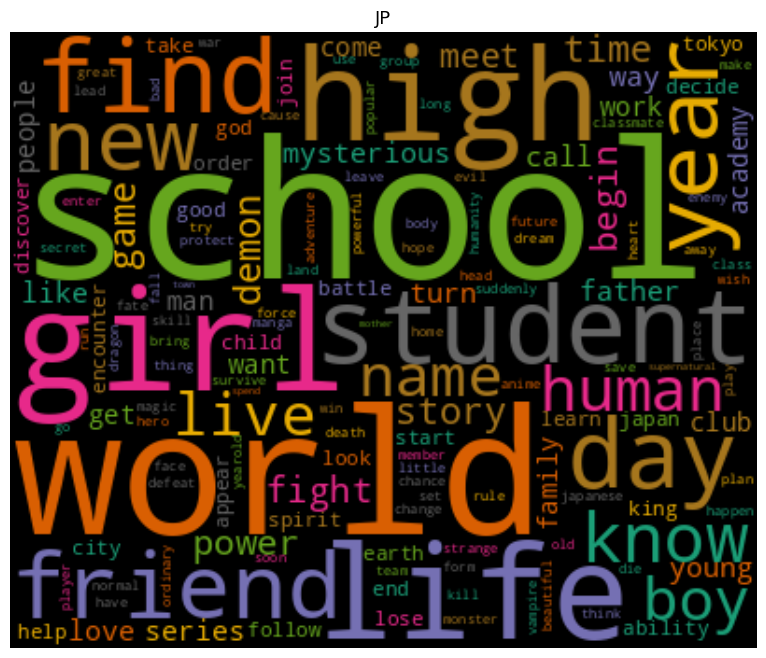

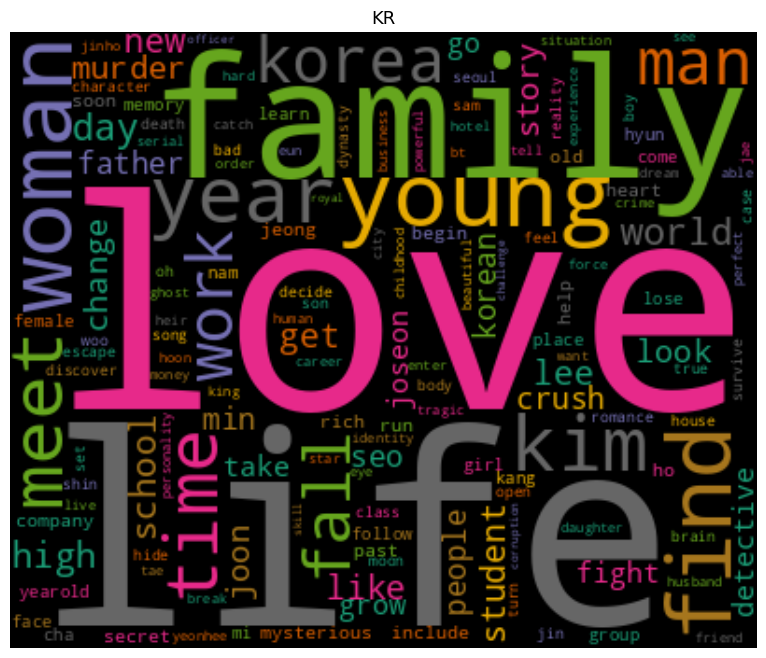

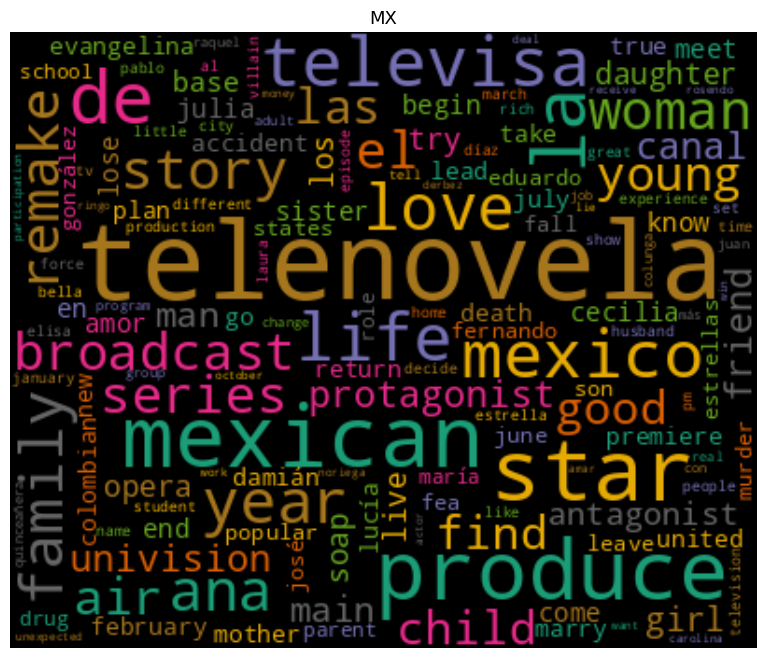

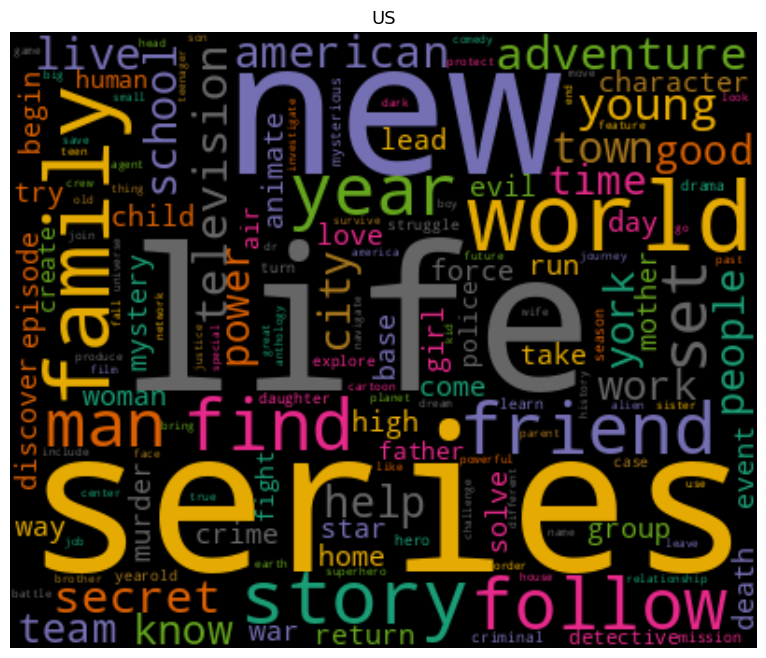

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [ ]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

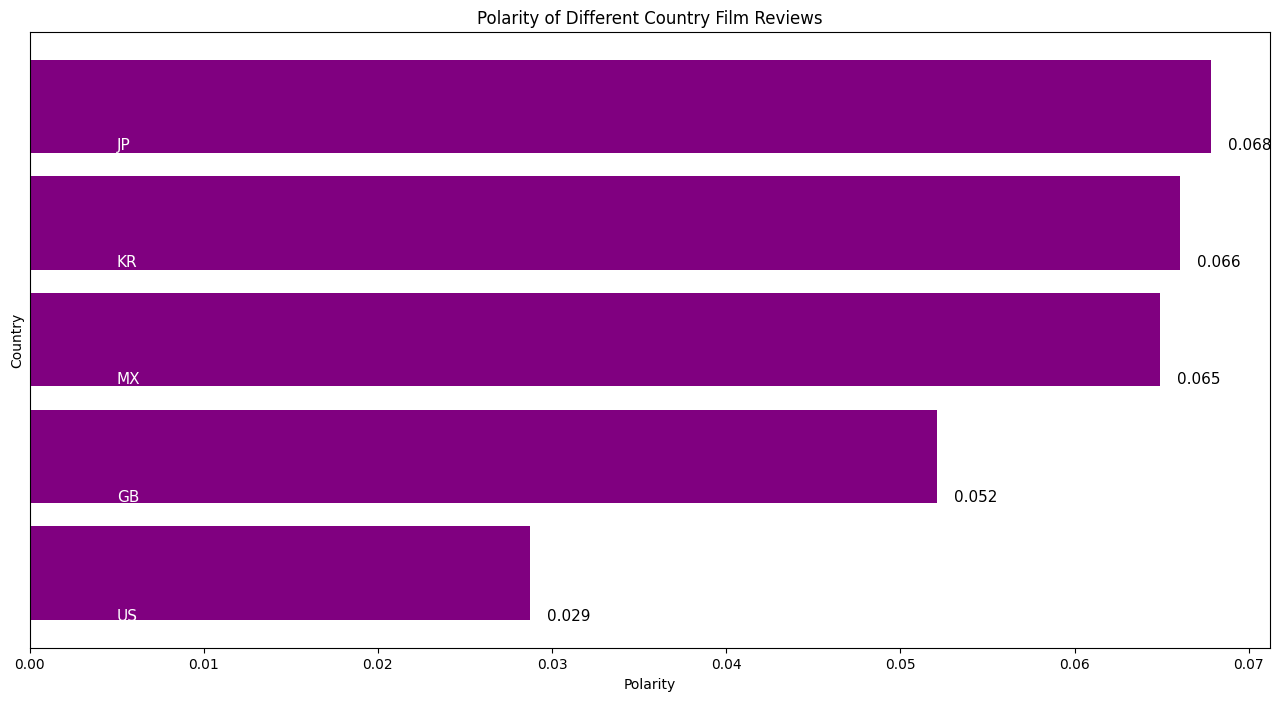

In [ ]:
product_polarity_sorted=pd.DataFrame(df.groupby('origin_country')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Country')
plt.title('Polarity of Different Country Film Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

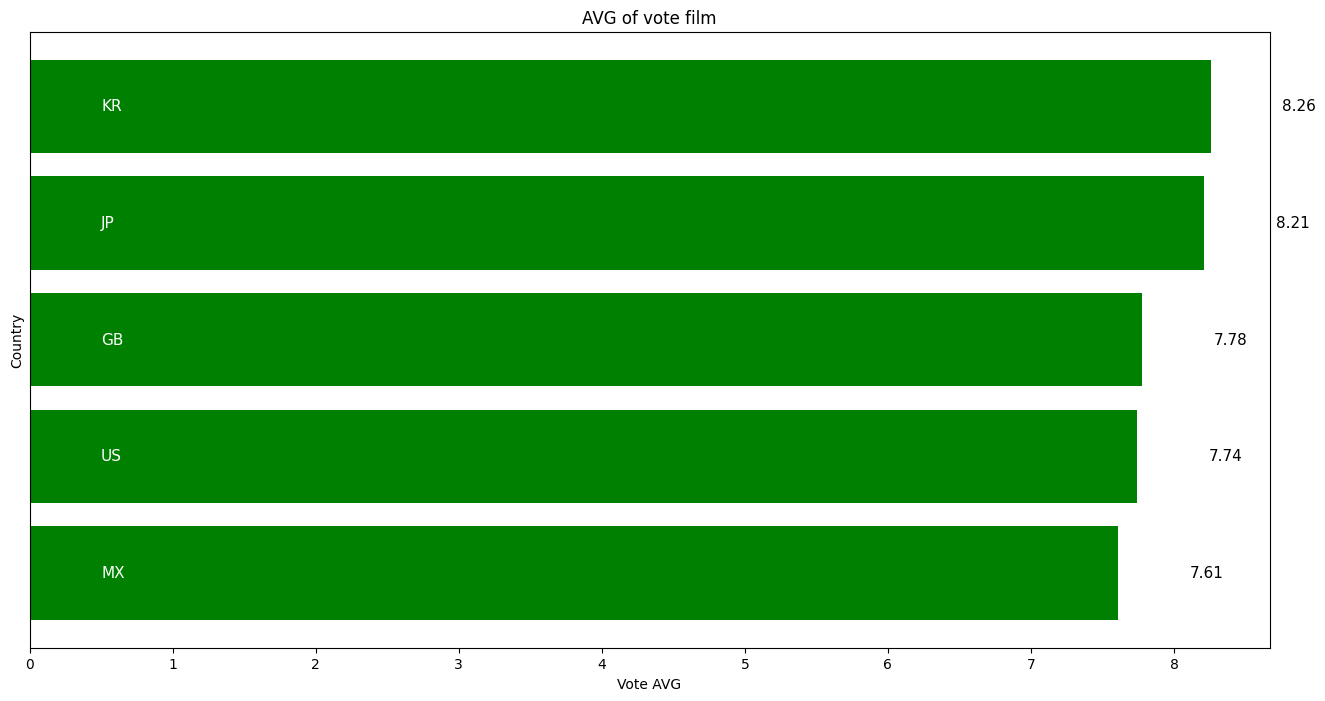

In [ ]:
vote_avg=pd.DataFrame(((df.groupby('origin_country')['vote_average'].sum())/df.groupby('origin_country')['vote_average'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Vote AVG')
plt.ylabel('Country')
plt.title('AVG of vote film')
vote_graph=plt.barh(np.arange(len(vote_avg.index)),vote_avg['vote_average'],color='green')


for bar,product in zip(vote_graph,vote_avg.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')


for bar,percentage in zip(vote_graph,vote_avg['vote_average']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

> Qua phân tích cho thấy:
* Với JP overview của các bộ phim thường hướng tới các nội dung như school, world, girl, friend, life, student.
* KR nội dung overview các nội dung chủ yếu là: love, family, life, young, women (hướng tới cuộc sống gia đình và tình yêu, phụ nữ).
* US nội dung overview chủ yếu là: new, life, series, family, world, story,..
* MX nội dung overview chủ yếu là: telenopela, mexican, produce, star, televisa,...

> US cũng có những bộ phim về các nội dung như family, life và world giống với JP và KR nhưng vì lý nào đó có khả năng là nội dung vì polarity cho chỉ số thấp nhất => overview mang tính tiêu cực hơn (có thể là phim mang nội dung cũng tiêu cực).